# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loadind Data

In [2]:
df=pd.read_csv("D:/Study/Datasets/Churn_Modelling(kaggle).csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Insights 

In [3]:
# Column Headings

print(list(df.columns))

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [4]:
df.set_index('RowNumber')
df.RowNumber.count()

# So we have 10,000 rows of Data

10000

In [5]:
df.info()

# 10000 rows with no NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df["Geography"].unique()

# We have Employee from 3 region: France, Spain and Germany

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df["Tenure"].unique()


array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [8]:
df["NumOfProducts"].unique()


array([1, 3, 2, 4], dtype=int64)

In [9]:
#Employees Left

#method 1

pd.value_counts(df['Exited'].values, sort=False)

0    7963
1    2037
dtype: int64

In [10]:
#method 2

count0=0
count1=0
for i in df["Exited"]:
    if i==1:
        count1=count1+1
    else:
        count0=count0+1
print("Number Of Employee Left :", count1)
print("Number OF Employee Stayed:", count0)
        


Number Of Employee Left : 2037
Number OF Employee Stayed: 7963


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Visualization


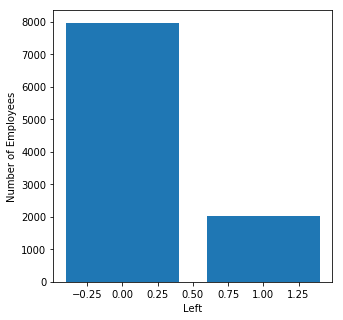

In [12]:
# Employees Left

left=df.groupby('Exited').count()
plt.figure(figsize=(5,5))
plt.bar(left.index.values, left['RowNumber'])
plt.xlabel('Left')
plt.ylabel('Number of Employees')
plt.show()

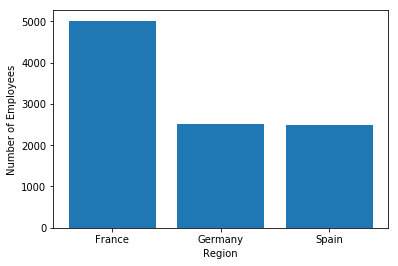

In [13]:
# Different Region

region=df.groupby('Geography').count()
plt.bar(region.index.values, region['RowNumber'])
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.show()

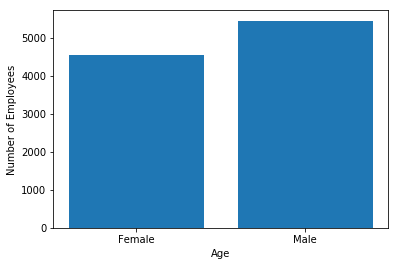

In [14]:
# Based On Gender

gender=df.groupby('Gender').count()
plt.bar(gender.index.values, gender['RowNumber'])
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

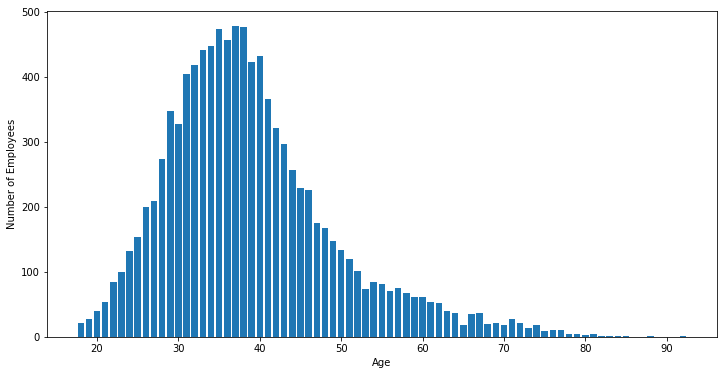

In [15]:
# Different AgeGroup

age=df.groupby('Age').count()
plt.figure(figsize=(12,6))
plt.bar(age.index.values, age['RowNumber'])
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

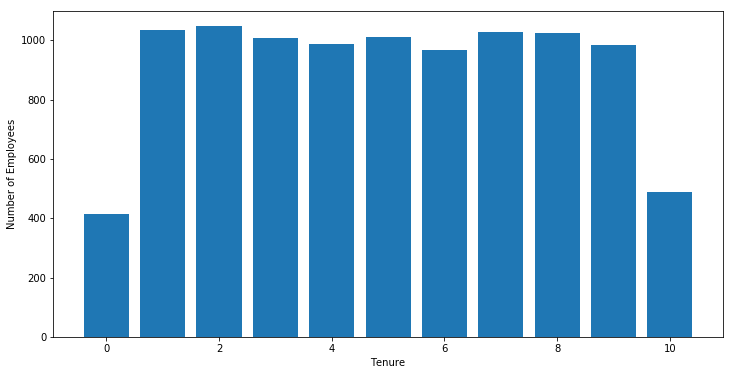

In [16]:
# Tenure

tenure=df.groupby('Tenure').count()
plt.figure(figsize=(12,6))
plt.bar(tenure.index.values, tenure['RowNumber'])
plt.xlabel('Tenure')
plt.ylabel('Number of Employees')
plt.show()

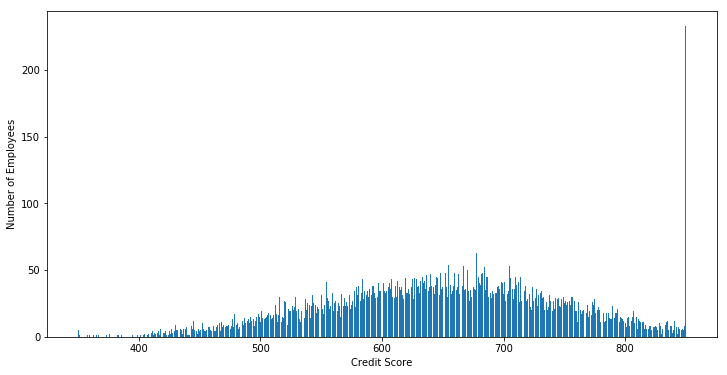

Max of Credit Score: 850
Employee with max Credit Score: 233


In [17]:
# Credit Score

cred_sco=df.groupby('CreditScore').count()
plt.figure(figsize=(12,6))
plt.bar(cred_sco.index.values, cred_sco['RowNumber'])
plt.xlabel('Credit Score')
plt.ylabel('Number of Employees')
plt.show()
print("Max of Credit Score:", df["CreditScore"].max())
count3=0
for i in df["CreditScore"]:
    if i==850:
        count3=count3+1
print("Employee with max Credit Score:", count3)

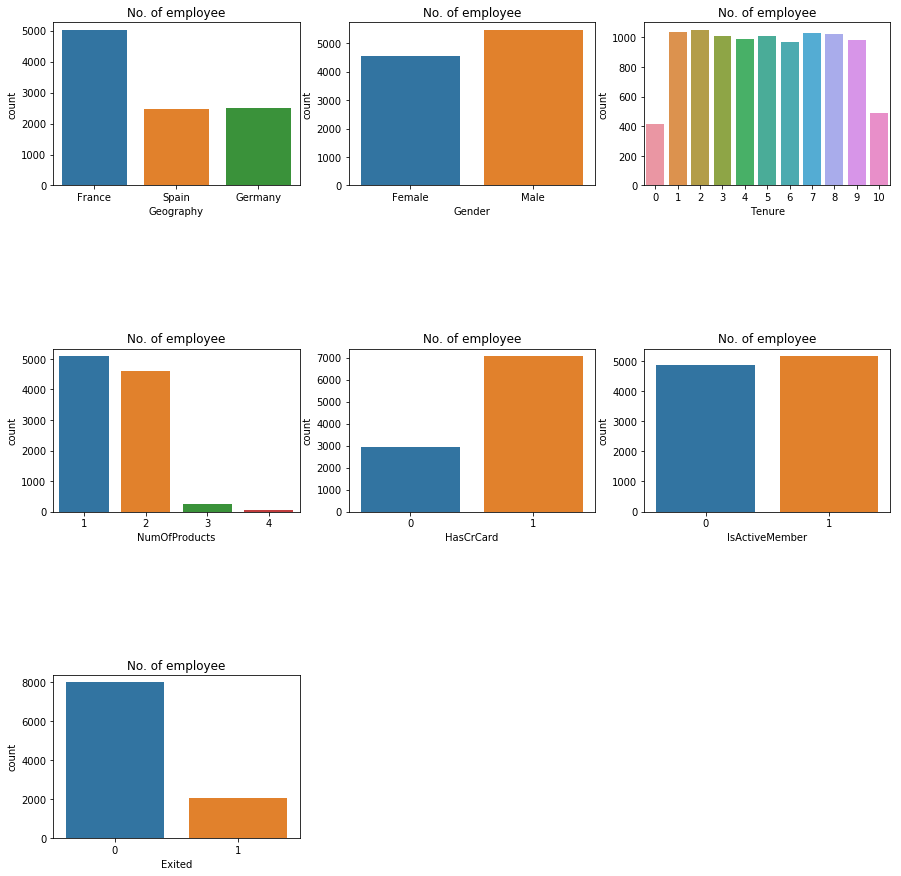

In [18]:
# Subplots

features=[ 'Geography', 'Gender','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.title("No. of employee")

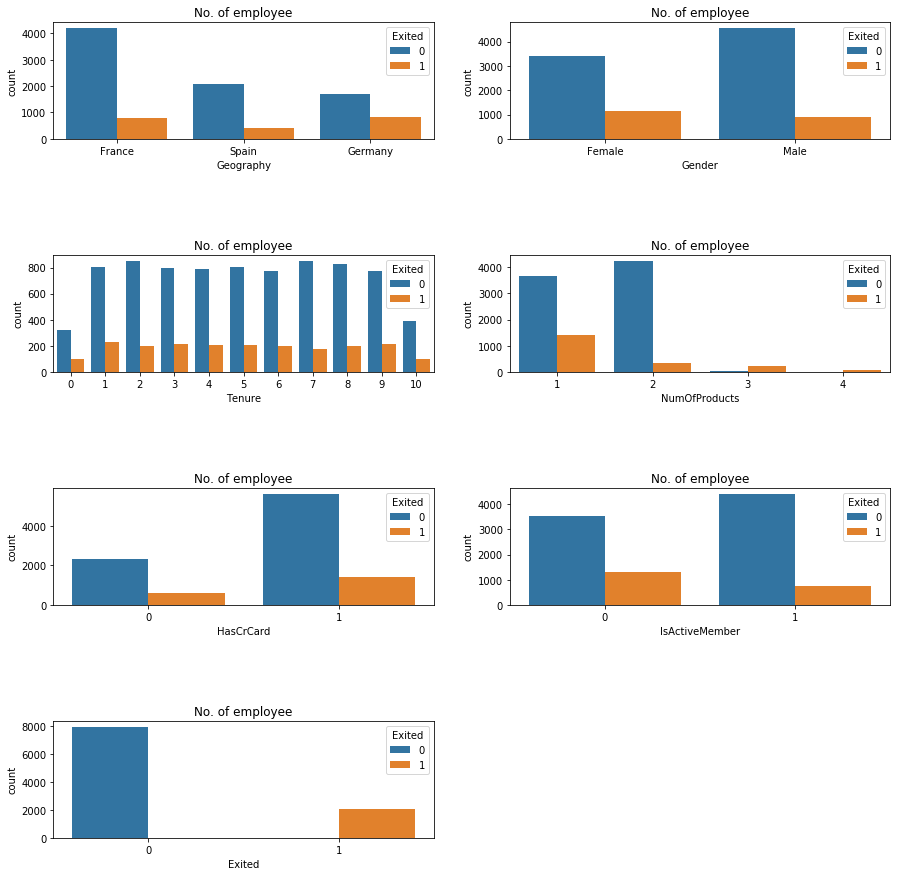

In [19]:

fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='Exited')
    plt.title("No. of employee")

# Building a Prediction Model

Data Pre-processing

In [20]:
column_to_keep=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
df=df[column_to_keep]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df["Geography"][df["Geography"]=="France"]=1
df["Geography"][df["Geography"]=="Spain"]=2
df["Geography"][df["Geography"]=="Germany"]=3

df["Gender"][df["Gender"]=="Female"]=1
df["Gender"][df["Gender"]=="Male"]=2

df.head()

C:\Users\Sankalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sankalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sankalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [22]:
corr=df.corr(method ='pearson') 
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


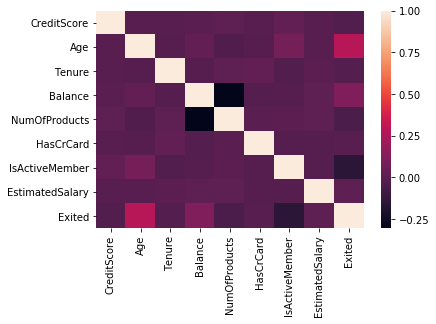

In [23]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [24]:
column_to_keep2=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited']
df=df[column_to_keep2]


In [25]:
X=df.iloc[:,0:9]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,619,1,1,42,2,0.00,1,1,101348.88
1,608,2,1,41,1,83807.86,1,1,112542.58
2,502,1,1,42,8,159660.80,3,0,113931.57
3,699,1,1,39,1,0.00,2,0,93826.63
4,850,2,1,43,2,125510.82,1,1,79084.10


In [26]:
Y=df.iloc[:,9]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [27]:
# Splitting Data In Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.05,random_state = 0)
Y_train=Y_train.astype('int')

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Sankalp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sankalp\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Sankalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  """


In [29]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

C:\Users\Sankalp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
Y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[388  13]
 [ 75  24]]


In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
# Model Precision
print("Precision:",metrics.precision_score(Y_test, Y_pred))
# Model Recall
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.824
Precision: 0.6486486486486487
Recall: 0.24242424242424243


In [56]:
# KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [57]:
Y_pred2 = classifier2.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred2)
print(confusion_matrix)

[[389  12]
 [ 57  42]]


In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred2))
# Model Precision
print("Precision:",metrics.precision_score(Y_test, Y_pred2))
# Model Recall
print("Recall:",metrics.recall_score(Y_test, Y_pred2))

Accuracy: 0.862
Precision: 0.7777777777777778
Recall: 0.42424242424242425
